100%|██████████| 170M/170M [02:06<00:00, 1.35MB/s] 


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [1/10], Loss: 0.0255


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [2/10], Loss: 0.0269


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [3/10], Loss: 0.0255


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [4/10], Loss: 0.0263


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [5/10], Loss: 0.0235


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [6/10], Loss: 0.0256


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [7/10], Loss: 0.0212


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [8/10], Loss: 0.0209


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch [9/10], Loss: 0.0284


  0%|          | 0/782 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.85882354..0.7490196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.85689306..0.59983903].


Epoch [10/10], Loss: 0.0202


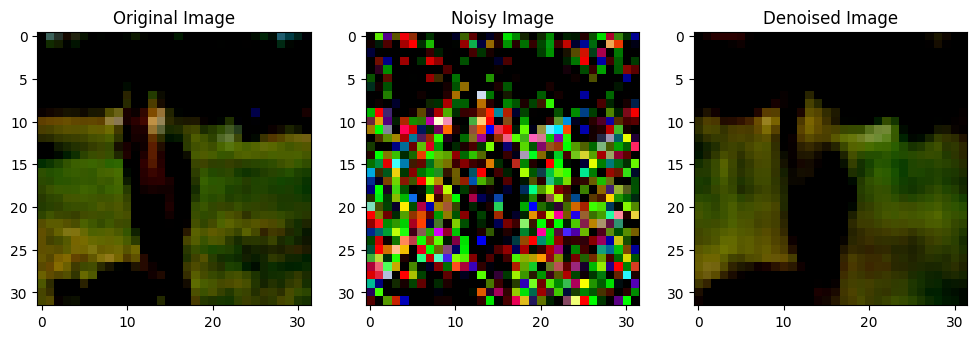

In [1]:
# Parte 1: Configuração do ambiente e instalação de bibliotecas
# !pip install torch torchvision tqdm

# Parte 2: Importação das bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Parte 3: Preparação do conjunto de dados CIFAR-10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Parte 4: Definição da arquitetura do modelo (UNet simplificado)
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = UNet()

# Parte 5: Configuração dos parâmetros de treinamento
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

# Parte 6: Implementação do processo de difusão (forward e reverse process)
def add_noise(images, noise_factor=0.5):
    noise = torch.randn_like(images) * noise_factor
    noisy_images = images + noise
    noisy_images = torch.clamp(noisy_images, 0., 1.)
    return noisy_images

def remove_noise(noisy_images):
    return model(noisy_images)

# Parte 7: Execução do treinamento e visualização dos resultados
for epoch in range(epochs):
    for images, _ in tqdm(train_loader):
        noisy_images = add_noise(images)
        denoised_images = remove_noise(noisy_images)

        loss = criterion(denoised_images, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Parte 8: Gerar e visualizar imagens
def visualize_results(images, noisy_images, denoised_images):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(images[0].permute(1, 2, 0).cpu().numpy())
    axes[0].set_title("Original Image")
    axes[1].imshow(noisy_images[0].permute(1, 2, 0).cpu().numpy())
    axes[1].set_title("Noisy Image")
    axes[2].imshow(denoised_images[0].detach().permute(1, 2, 0).cpu().numpy())
    axes[2].set_title("Denoised Image")
    plt.show()

# Teste final: Visualização de exemplos
dataiter = iter(train_loader)
images, _ = next(dataiter)  # Corrigido
noisy_images = add_noise(images)
denoised_images = remove_noise(noisy_images)

visualize_results(images, noisy_images, denoised_images)
